In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk

In [30]:

labels = [2, 5, 10, 20, 40, 50, 85]

f1_macro = []
f1_micro = []
acc = []
x = []
label_dicts = {}
num_nodes_reconstructed = 10
for label in labels:
    results = []
    f1_mi = []
    f1_ma = []
    a = []
    for i in range(1,5):
        file_name = "partition_"+str(i)+"_sampler_Random_label_" + str(label) + ".pk"
        with open(file_name, 'rb') as f:
            result_dict = pk.load(f)
        results.append(result_dict)
        f1_ma.append(result_dict['scores']['f1_macro'])
        f1_mi.append(result_dict['scores']['f1_micro'])
        a.append(result_dict['scores']['acc'])
    f1_macro.append(np.mean(f1_ma))
    f1_micro.append(np.mean(f1_mi))
    acc.append(np.mean(a))
    x.append(result_dict['label_percent'])
    label_dicts[label] = results
        



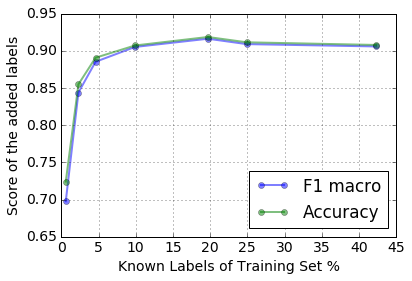

In [48]:
w=2
a =0.5
plt.plot(x,f1_macro,'bo-', alpha= a,linewidth=w,label='F1 macro')
#plt.plot(x,f1_micro,'ko-',  alpha= a,linewidth=w)
plt.plot(x,acc,'go-',  alpha= a,linewidth=w,label='Accuracy')
plt.rcParams.update({'font.size': 14})
plt.xlabel("Known Labels of Training Set %")
plt.ylabel("Score of the added labels")
plt.legend(loc=4)
plt.grid(True)
plt.show()